In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import r2_score 

In [10]:
# import and read files (.mat files converted to .xlsx)
df_cholesterol_chf = pd.read_excel('cholesterol_CHF.xlsx')
df_cholesterol = pd.read_excel('cholesterol_normal.xlsx')
df_weight_chf = pd.read_excel('weight_CHF.xlsx')
df_weight = pd.read_excel('weight_normal.xlsx')

total_chf = 150

x1 = np.array(df_weight_chf).flatten()
y1 = np.array(df_cholesterol_chf).flatten()
x2 = np.array(df_weight).flatten()
y2 = np.array(df_cholesterol).flatten()

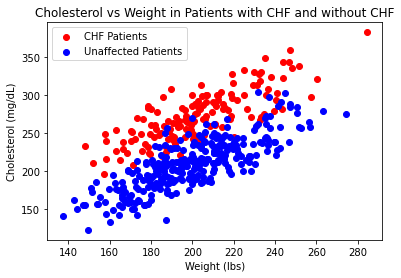

In [11]:
# QUESTION 1A

plt.scatter(x1, y1, c='r', label='CHF Patients') # Creates a scatter plot of CHF Patients
plt.scatter(x2, y2, c='b', label='Unaffected Patients') # Creates a scatter plot of unaffected patients

plt.xlabel('Weight (lbs)') # assigns a y axis label
plt.ylabel('Cholesterol (mg/dL)') # assigns an x axis label
plt.title('Cholesterol vs Weight in Patients with CHF and without CHF') # assigns a title
plt.legend() # creates a legend for the scatter plot
plt.show() # displays the scatterplot

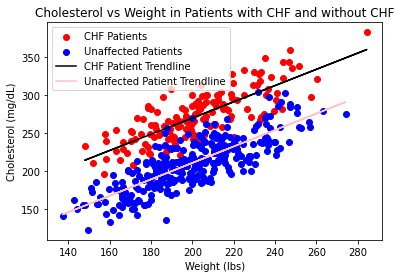

The coefficients of the first trendline are: [ 1.07005356 56.17592804]
The coefficients of the second trendline are: [ 1.08355707 -5.71732499]


In [12]:
# QUESTION 1B

plt.scatter(x=df_weight_chf, y=df_cholesterol_chf, c='r', label='CHF Patients') # Creates a scatter plot of CHF Patients
theta1 = np.polyfit(x1, y1, 1) # calculates coefficients for first trendline

plt.scatter(x2, y2, c='b', label='Unaffected Patients') # Creates a scatter plot of unaffected patients
theta2 = np.polyfit(x2, y2, 1) # calculates coefficients for second trendline

y_line1 = theta1[1] + theta1[0] * x1 # sets the equation for the first trendline
y_line2 = theta2[1] + theta2[0] * x2 # sets the equation for the second trendline

plt.plot(x1, y_line1, c='black', label='CHF Patient Trendline') # graphs the first trendline
plt.plot(x2, y_line2, c='pink', label='Unaffected Patient Trendline') # graphs the second trendline

plt.xlabel('Weight (lbs)') # assigns a y axis label
plt.ylabel('Cholesterol (mg/dL)') # assigns an x axis label
plt.title('Cholesterol vs Weight in Patients with CHF and without CHF') # assigns a title
plt.legend() # creates a legend for the scatter plot
plt.show() # displays the scatterplot

print(f'The coefficients of the first trendline are: {theta1}')
print(f'The coefficients of the second trendline are: {theta2}')


In [13]:
# QUESTION 1C

print('''The CHF positive and CHF negative trendlines have a nearly identical slope but different y-intercepts. 
Because cholestrol is a function of weight, the cut-off line to tell if a patient is CHF positive or negative will 
be between the two trendlines. The slope will be the average of the two slopes (1.07 + 1.08) / 2 = 1.075. 
The intercept will be the average of the two intercepts (56.18 - 5.72) / 2 = 25.23. Thus, the equation of the 
new line is y = 1.075x + 25.23. When plotted on a graph, if a point representing a patient is above the line, 
the patient has CHF. If a point is below the line, a patient does not have CHF.''')

The CHF positive and CHF negative trendlines have a nearly identical slope but different y-intercepts. 
Because cholestrol is a function of weight, the cut-off line to tell if a patient is CHF positive or negative will 
be between the two trendlines. The slope will be the average of the two slopes (1.07 + 1.08) / 2 = 1.075. 
The intercept will be the average of the two intercepts (56.18 - 5.72) / 2 = 25.23. Thus, the equation of the 
new line is y = 1.075x + 25.23. When plotted on a graph, if a point representing a patient is above the line, 
the patient has CHF. If a point is below the line, a patient does not have CHF.


In [14]:
# SEE MATLAB FILE FOR 1D AND 1E

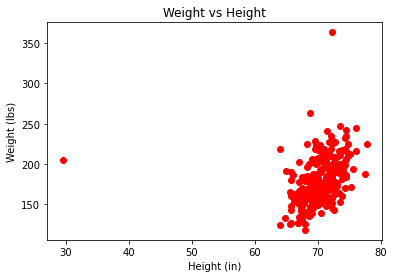

In [15]:
# QUESTION 2A

df_2 = pd.read_excel('HW3P2.xlsx') # read excel file

h_df_2 = df_2['height (in)']
w_df_2 = df_2['weight (lbs)']

plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Height')
plt.scatter(h_df_2, w_df_2, c='r',) # Creates a scatter plot of CHF Patients

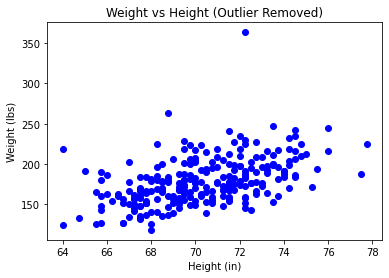

In [16]:
# QUESTION 2B

df_2 = df_2.drop(df_2.index[41]) # removes outlier from dataset
fixed_h_df_2 = df_2['height (in)'] 
fixed_w_df_2 = df_2['weight (lbs)']

# axis and plot titles
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Height (Outlier Removed)')

plt.scatter(fixed_h_df_2, fixed_w_df_2, c='b') # plots new scatter plot with no outlier

In [17]:
# QUESTION 2C

x_vals = df_2['height (in)']
y_vals = df_2['weight (lbs)']

x_mat = np.vstack((np.ones(len(x_vals)), x_vals)).T

x_mat[0:5,]
beta_hat = np.linalg.inv(x_mat.T.dot(x_mat)).dot(x_mat.T).dot(y_vals)
print(beta_hat)

[-207.73492227    5.49781366]


In [18]:
# QUESTION 2D

df_2['y_pred'] = df_2['height (in)'] * 5.49781366 - 207.7349227

R_square = r2_score(y_vals, df_2['y_pred']) 
print('R Squared Value: ', R_square)

R Squared Value:  0.2389742898190772


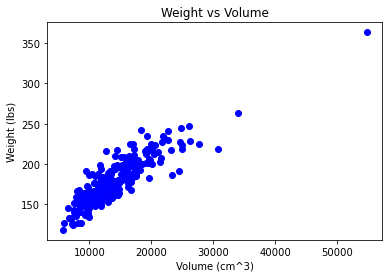

In [32]:
# QUESTION 3A

df_2['volume'] = (df_2["abdomen circumference (cm)"] / (2 * np.pi)) * (df_2["abdomen circumference (cm)"] / (2 * np.pi)) * (df_2["abdomen circumference (cm)"] / (2 * np.pi)) * 4 / 3 * 3.141592653589
volume_df = df_2['volume']

x3 = np.array(volume_df).flatten()
y3 = np.array(fixed_w_df_2).flatten()

# axis and plot titles
plt.xlabel('Volume (cm^3)')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Volume')

plt.scatter(volume_df, fixed_w_df_2, c='b') # plots new scatter plot with no outlier

The coefficients of the second trendline (using matrix method) are: [1.11415149e+02 4.83912277e-03]
The coefficients of the second trendline (using polyfit) are: [4.83912277e-03 1.11415149e+02]
***Note the coefficients are identical, just printed in reverse order.***


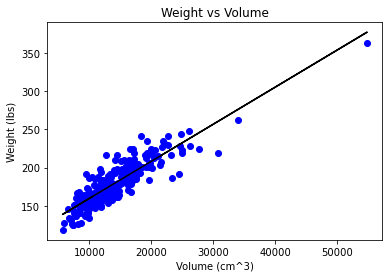

In [45]:
# QUESTION 3B
# Slack question channel says no curve fitting toolbox is needed

# axis and plot titles
plt.xlabel('Volume (cm^3)')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Volume')

plt.scatter(volume_df, fixed_w_df_2, c='b') # plots new scatter plot with no outlier

x_vals2 = df_2['volume']
y_vals2 = df_2['weight (lbs)']

x_mat2 = np.vstack((np.ones(len(x_vals2)), x_vals2)).T

beta_hat2 = np.linalg.inv(x_mat2.T.dot(x_mat2)).dot(x_mat2.T).dot(y_vals2)
print(f'The coefficients of the second trendline (using matrix method) are: {beta_hat2}')

theta3 = np.polyfit(x3, y3, 1) # calculates coefficients for trendline
y_line3 = theta3[1] + theta3[0] * x3 # sets the equation for trendline
plt.plot(x3, y_line3, c='black') # graphs the trendline

print(f'The coefficients of the second trendline (using polyfit) are: {theta3}')
print('***Note the coefficients are identical, just printed in reverse order.***')

The coefficients of the second trendline (using matrix method) are: [6.97132460e+01 8.83733164e-04]


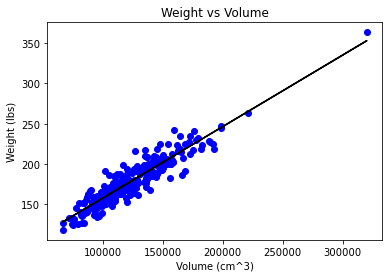

In [66]:
# QUESTION 3C

df_2['height (cm)'] = df_2['height (in)'] * 2.54
df_2['cylindrical volume (cm^3)'] = (df_2["abdomen circumference (cm)"] / (2 * np.pi)) * (df_2["abdomen circumference (cm)"] / (2 * np.pi)) * np.pi * df_2['height (cm)']

cylinder_volume_df = df_2['cylindrical volume (cm^3)']

x_vals3 = df_2['cylindrical volume (cm^3)']
y_vals3 = df_2['weight (lbs)']

x_mat3 = np.vstack((np.ones(len(x_vals3)), x_vals3)).T

beta_hat3 = np.linalg.inv(x_mat3.T.dot(x_mat3)).dot(x_mat3.T).dot(y_vals3)

# axis and plot titles
plt.xlabel('Volume (cm^3)')
plt.ylabel('Weight (lbs)')
plt.title('Weight vs Volume')

plt.scatter(cylinder_volume_df, fixed_w_df_2, c='b')

x4 = np.array(cylinder_volume_df).flatten()

y_line4 = beta_hat3[0] + beta_hat3[1] * x4 # sets the equation for trendline
plt.plot(x4, y_line4, c='black') # graphs the trendline

print(f'The coefficients of the second trendline (using matrix method) are: {beta_hat3}')

In [77]:
# QUESTION 3D

df_2['y_pred2'] = df_2['volume'] * 4.83912277e-03 + 1.11415149e+02

R_square2 = r2_score(y_vals2, df_2['y_pred2']) 
print('R Squared Value (3B): ', R_square2)

df_2['y_pred3'] = df_2['cylindrical volume (cm^3)'] * 8.83733164e-04 + 6.97132460e+01

R_square3 = r2_score(y_vals3, df_2['y_pred3']) 
print('R Squared Value (3C): ', R_square3)
print('-------------------------------------------------------------------------------')
print('''The R^2 value for (3B) is 0.781. The R^2 value for (3C) is 0.868. 
Therefore, the model for a cylindrical body is more accurate.''')

R Squared Value (3B):  0.780699393392164
R Squared Value (3C):  0.8677769288297827
-------------------------------------------------------------------------------
The R^2 value for (3B) is 0.781. The R^2 value for (3C) is 0.868. 
Therefore, the model for a cylindrical body is more accurate.


In [ ]:
# SEE MATLAB FILE FOR QUESTION 4